In [14]:
import sys
import numpy as np
from os import listdir
from os.path import isfile, join

#FOR debugging
import time
import matplotlib.pyplot as plt

In [15]:
def read(path):
    start=time.time()

    path_files = [f for f in listdir(path)]
    num_files=len(path_files)
    img_arrays= [None] * num_files
    for i in range(num_files):
        files = [f for f in listdir(path+"/"+path_files[i]) if isfile(join(path+"/"+path_files[i], f))]
        num_frames=len(files)
        frames_arrays= [None] * num_frames
        for j in range(num_frames):
            frames_arrays[j]=np.load(path+"/"+path_files[i]+"/"+files[j])
        img_arrays[i]=frames_arrays

    print("Elapsed time = ", time.time()-start)
    return img_arrays

In [16]:
def process_frame(frame,debug):
    #NOT IMPLEMENTED YET
    return frame


In [17]:
def process_video(video,debug):
    processed_frames=[None]*len(video)
    for i in range(len(video)):
        if (debug and (i+1)%100==0):
            print(" -> Processing frame ",i+1," of ",len(video))
        processed_frames[i]=process_frame(video[i],debug)
    return processed_frames

In [18]:
def processdir(path, debug=False):
    video_arrays = read(path)
    if(debug):
        print("Number of read videos: "+str(len(video_arrays)))
    processed_videos = [None] * len(video_arrays)
    for i in range(len(video_arrays)):
        if (debug):
            print("Processing video ",i+1," of ",len(video_arrays))
        processed_videos[i]=process_video(video_arrays[i],debug)
    print("DONE!")

In [19]:
import numpy as np
import matplotlib.pyplot as plt


In [24]:
img = np.load('../CARDIO_videos/20170102_SME_085/20170102_SME_085_2000.npy')

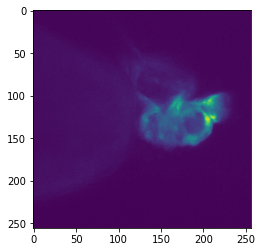

In [25]:
plt.imshow(img)

(array([0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 3.000e+00, 2.400e+01, 5.100e+01,
        7.500e+01, 2.750e+02, 3.210e+02, 7.300e+02, 7.260e+02, 1.524e+03,
        1.133e+03, 1.922e+03, 1.959e+03, 1.280e+03, 1.873e+03, 1.236e+03,
        1.902e+03, 1.230e+03, 1.913e+03, 1.253e+03, 1.958e+03, 1.198e+03,
        1.833e+03, 1.677e+03, 9.880e+02, 1.344e+03, 8.370e+02, 1.050e+03,
        6.110e+02, 7.950e+02, 4.550e+02, 6.110e+02, 5.660e+02, 3.240e+02,
        4.010e+02, 2.510e+02, 3.700e+02, 2.210e+02, 3.010e+02, 2.090e+02,
        2.820e+02, 1.980e+02, 2.620e+0

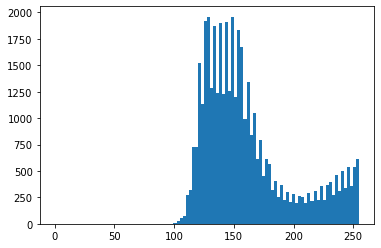

In [26]:
plt.hist(img.flat, bins=100, range=(0, 255))

In [30]:
import numpy as np

def image_histogram_equalization(image, number_bins=256):
    # from http://www.janeriksolem.net/2009/06/histogram-equalization-with-python-and.html

    # get image histogram
    image_histogram, bins = np.histogram(image.flatten(), number_bins, density=True)
    cdf = image_histogram.cumsum() # cumulative distribution function
    cdf = 255 * cdf / cdf[-1] # normalize

    # use linear interpolation of cdf to find new pixel values
    image_equalized = np.interp(image.flatten(), bins[:-1], cdf)

    return image_equalized.reshape(image.shape), cdf

if __name__ == '__main__':

    # generate some test data with shape 1000, 1, 96, 96
    data = np.random.rand(1000, 1, 96, 96)

    # loop over them
    data_equalized = np.zeros(data.shape)
    for i in range(data.shape[0]):
        image = data[i, 0, :, :]
        data_equalized[i, 0, :, :] = image_histogram_equalization(image)[0]

In [31]:
equ = image_histogram_equalization(img)

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([  0.  ,   2.55,   5.1 ,   7.65,  10.2 ,  12.75,  15.3 ,  17.85,
         20.4 ,  22.95,  25.5 ,  28.05,  30.6 ,  33.15,  35.7 ,  38.25,
         40.8 ,  43.35,  45.9 ,  48.45,  51.  ,  53.55,  56.1 ,  58.65,
         61.2 ,  63.75,  66.3 ,  68.85,  71.4 ,  73.95,  76.5 ,  79.05,
         81.6 ,  84.15,  86.7 ,  89.25,  91.8 ,  94.35,  96.9 ,  99.45,
        102.  , 104.55, 107.1 , 109.65, 112.2 , 114.75, 117.3 , 119.85,
        122.4 , 124.95, 127.5 , 130.05, 132.6 , 135.15, 137.7 , 140.25,
        142.8 , 145.35, 147.9 , 150.45, 153.  , 155.55, 158.1 , 160.65,
        163.2 , 165.75, 168.3 , 170.85, 173.4 , 175.95, 178.5 , 181.05,
        183.6 , 186.15, 188.7 , 191.25, 193.8 , 196.35, 198.9 , 201.45,
        204.  , 206.55, 209.1 ,

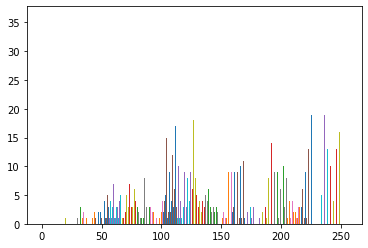

In [42]:
plt.hist(equ[0], bins=100, range=(0, 255))